# Análisis Exploratorio de Datos - Severidad de Siniestros Actuariales

**Objetivo**: Analizar y comprender el comportamiento de los datos de siniestros de seguros.

**Variables**:
- `edad`: Edad del asegurado (18-70 años)
- `tipo_vehiculo`: Tipo de vehículo asegurado
- `antiguedad_vehiculo`: Años de antigüedad del vehículo
- `region`: Región geográfica
- `historial_siniestros`: Número de siniestros previos
- `costo_siniestro`: Variable objetivo (costo del siniestro)

In [ ]:
pip install matplotlib seaborn pandas numpy scipy statsmodels jupyterlab scikit-learn jupyter fastapi uvicorn python-multipart pydantic

In [4]:
#Importar librerías

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# CORRECCIÓN: Añadir la ruta correcta al path
project_root = os.path.abspath('..')  # Subir un nivel desde notebooks/
sys.path.append(project_root)

# Ahora importamos directamente desde nuestros módulos
from src.data.make_dataset import generate_sample_data

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("✅ Librerías importadas correctamente")
print(f"📁 Directorio actual: {os.getcwd()}")
print(f"📁 Ruta del proyecto: {project_root}")

✅ Librerías importadas correctamente
📁 Directorio actual: /home/mz8k/mlops-severidad-siniestros-actuariales/notebooks
📁 Ruta del proyecto: /home/mz8k/mlops-severidad-siniestros-actuariales


In [5]:
# Generar datos sintéticos
print("📊 Generando dataset sintético de siniestros...")
df = generate_sample_data()

print(f"📐 Dimensiones del dataset: {df.shape}")
print(f"🎯 Variable objetivo: 'costo_siniestro'")
print("\n🔍 Primeras 5 filas:")
df.head()


📊 Generando dataset sintético de siniestros...
📐 Dimensiones del dataset: (1000, 6)
🎯 Variable objetivo: 'costo_siniestro'

🔍 Primeras 5 filas:


,edad,tipo_vehiculo,antiguedad_vehiculo,region,historial_siniestros,costo_siniestro
0,56,Pickup,16,Oeste,3,2266.121903
1,69,Pickup,17,Sur,1,3016.702311
2,46,Pickup,7,Este,3,1212.801990
3,32,Motocicleta,12,Oeste,0,4679.692173
4,60,Sedan,18,Oeste,0,689.014119


In [6]:
# Información general del dataset
print("📋 INFORMACIÓN GENERAL DEL DATASET")
print("=" * 50)
print(df.info())
print("\n" + "=" * 50)
print("📊 ESTADÍSTICAS DESCRIPTIVAS")
print(df.describe())


📋 INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edad                  1000 non-null   int64  
 1   tipo_vehiculo         1000 non-null   object 
 2   antiguedad_vehiculo   1000 non-null   int64  
 3   region                1000 non-null   object 
 4   historial_siniestros  1000 non-null   int64  
 5   costo_siniestro       1000 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB
None

📊 ESTADÍSTICAS DESCRIPTIVAS
             edad  antiguedad_vehiculo  historial_siniestros  costo_siniestro
count  1000.00000          1000.000000            1000.00000      1000.000000
mean     43.81900             9.396000               1.98100      1993.015481
std      14.99103             5.744404               1.42642      1408.417151
min      18.00000             0.000000      

In [7]:
# Análisis de valores nulos
print("🔍 ANÁLISIS DE VALORES NULOS")
print("=" * 30)
print(df.isnull().sum())
print(f"\n✅ No hay valores nulos en el dataset")


🔍 ANÁLISIS DE VALORES NULOS
edad                    0
tipo_vehiculo           0
antiguedad_vehiculo     0
region                  0
historial_siniestros    0
costo_siniestro         0
dtype: int64

✅ No hay valores nulos en el dataset


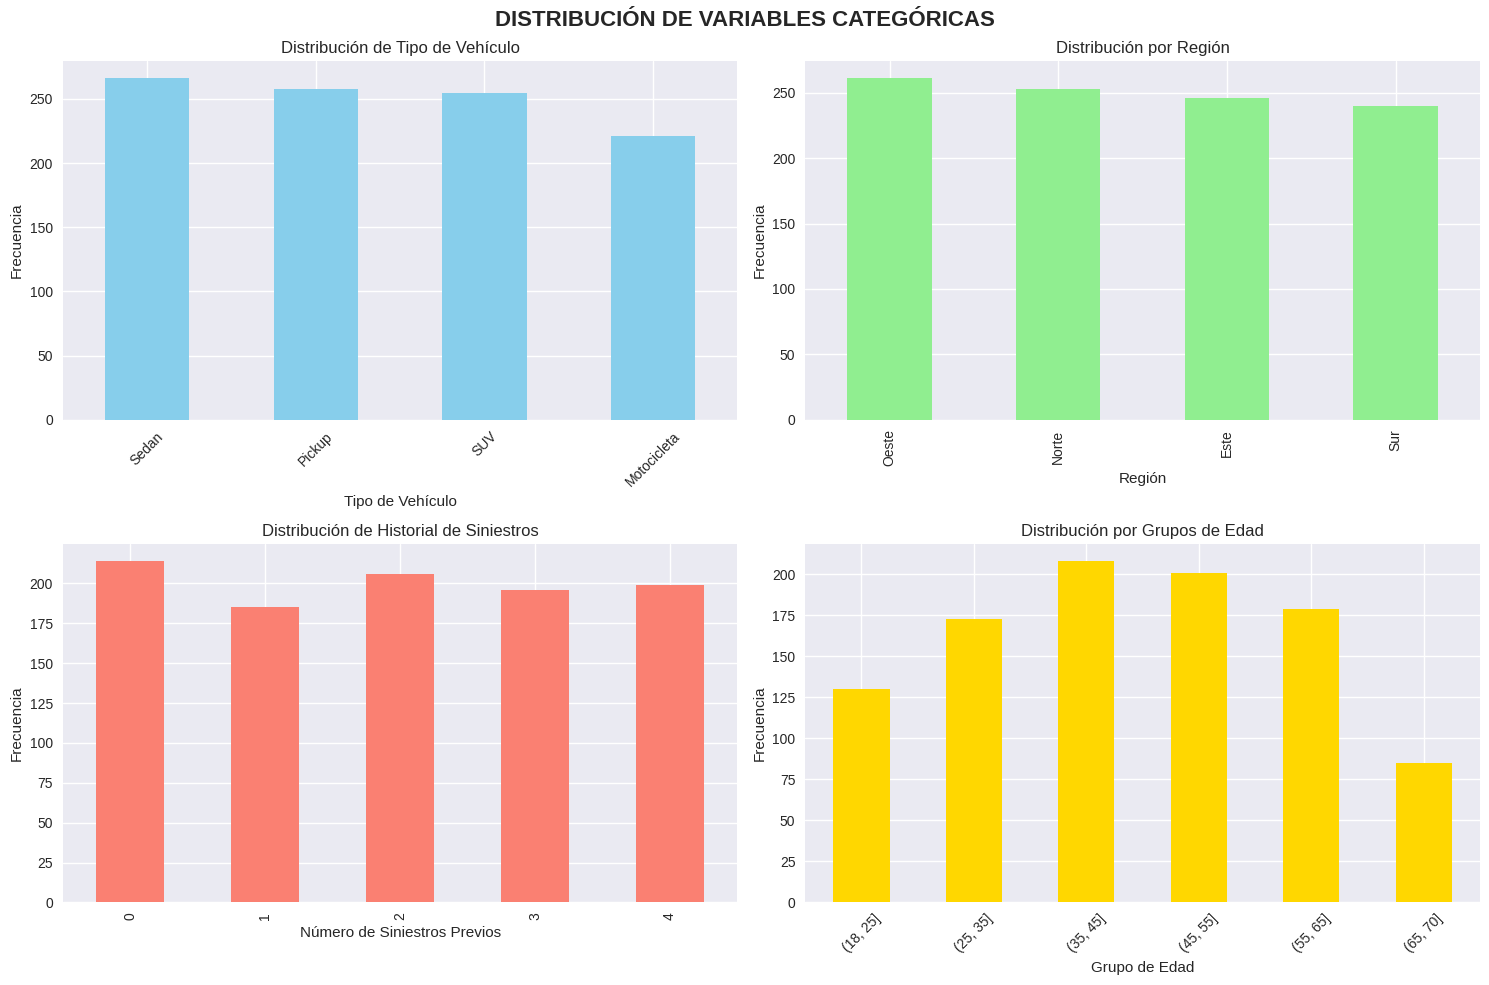

In [8]:
# Distribución de variables categóricas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS', fontsize=16, fontweight='bold')

# Tipo de vehículo
df['tipo_vehiculo'].value_counts().plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Distribución de Tipo de Vehículo')
axes[0,0].set_xlabel('Tipo de Vehículo')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].tick_params(axis='x', rotation=45)

# Región
df['region'].value_counts().plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Distribución por Región')
axes[0,1].set_xlabel('Región')
axes[0,1].set_ylabel('Frecuencia')

# Historial de siniestros
df['historial_siniestros'].value_counts().sort_index().plot(kind='bar', ax=axes[1,0], color='salmon')
axes[1,0].set_title('Distribución de Historial de Siniestros')
axes[1,0].set_xlabel('Número de Siniestros Previos')
axes[1,0].set_ylabel('Frecuencia')

# Edad (agrupada)
df['edad_grupo'] = pd.cut(df['edad'], bins=[18, 25, 35, 45, 55, 65, 70])
df['edad_grupo'].value_counts().sort_index().plot(kind='bar', ax=axes[1,1], color='gold')
axes[1,1].set_title('Distribución por Grupos de Edad')
axes[1,1].set_xlabel('Grupo de Edad')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()